In [31]:
%run functions.ipynb
#%run data_preparation.ipynb

# Open all files / computing intensive
base_folder_path = '/workspaces/nyc_bike_rental//data'
start_year = 2015
end_year = 2019
cd = combine_csv_files_in_years(base_folder_path,start_year,end_year)

Cat = list(cd.columns)
for i in range(15):
  cd[Cat[i]] = cd[Cat[i]].fillna(cd[Cat[i+15]])
Bad_Cat = Cat[15:30]
cd = cd.drop(columns=Bad_Cat)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

1.26.4


In [125]:
# Extract year, date, hour, and time into separate columns
#cd['Start Time'] = pd.to_datetime(cd['Start Time'], format='%Y-%m-%d %H:%M:%S', errors='raise')
#print(cd['Start Time'].dt.year)
#cd['Date'] = cd['Start Time'].dt.date
#cd['Hour'] = cd['Start Time'].dt.hour
#cd['Time'] = cd['Start Time'].dt.time


first_4_chars = cd['Start Time'].str[:4]
years = pd.to_numeric(first_4_chars, errors='coerce')
time = cd['Start Time'].str[11:16].to_list()
#cd['Years'] = years                                    Will not add new Dataframe column.....

type(time)

list

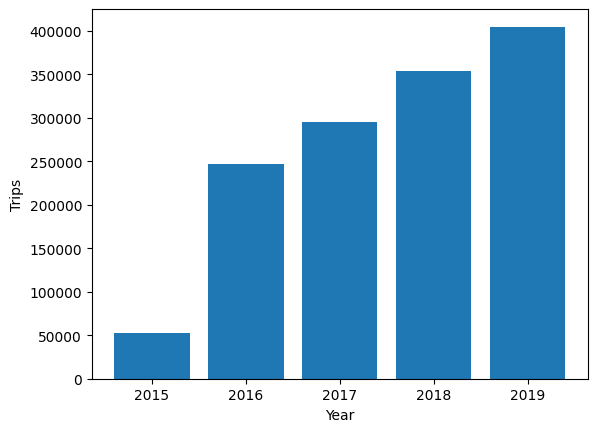

In [108]:
years_list = ['2015','2016','2017','2018','2019']
Trips = []
for y in years_list:
    test = cd[cd['Start Time'].str[:4] == y]
    Trips.append(len(test))

plt.bar(years_list, Trips)
plt.xlabel('Year')
plt.ylabel('Trips')
plt.show()

In [117]:

    test = cd[(cd['Start Time'].str[:4] == '2015') & (cd['Birth Year'] == 1977 )]
    test.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
8,382.0,2015-12-01 06:06:29,2015-12-01 06:12:51,3207.0,Oakland Ave,40.737604,-74.052478,3195.0,Sip Ave,40.730743,-74.063784,24411.0,Subscriber,1977.0,1.0
25,132.0,2015-12-01 07:38:05,2015-12-01 07:40:17,3213.0,Van Vorst Park,40.718489,-74.047727,3186.0,Grove St PATH,40.719586,-74.043117,24409.0,Subscriber,1977.0,1.0
26,300.0,2015-12-01 07:40:52,2015-12-01 07:45:52,3203.0,Hamilton Park,40.727596,-74.044247,3186.0,Grove St PATH,40.719586,-74.043117,24541.0,Subscriber,1977.0,1.0
28,299.0,2015-12-01 07:42:28,2015-12-01 07:47:28,3186.0,Grove St PATH,40.719586,-74.043117,3184.0,Paulus Hook,40.714145,-74.033552,24700.0,Subscriber,1977.0,1.0
30,324.0,2015-12-01 07:48:38,2015-12-01 07:54:02,3207.0,Oakland Ave,40.737604,-74.052478,3215.0,Central Ave,40.746730,-74.049251,24447.0,Subscriber,1977.0,2.0


In [141]:
#time by minutes - takes way to long.... see next box
times_uq = sorted(set(time))
times_short = times_uq[0:10]
times_count = []
for t in times_short:
    test = cd[cd['Start Time'].str[11:16] == t]
    times_count.append(len(test))
print(times_count)

[228, 256, 293, 349, 294, 254, 287, 261, 259, 235]


[10968, 5993, 3390, 2220, 3304, 13001, 38985, 91994, 158577, 82541, 53449, 52095, 59298, 59609, 56463, 59533, 73497, 125911, 139049, 99911, 68861, 46125, 31281, 18179]


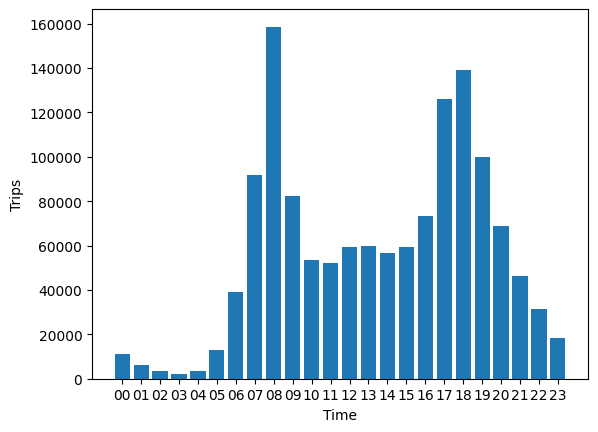

In [145]:
hours = cd['Start Time'].str[11:13].to_list()
hours_uq = sorted(set(hours))
hours_count = []
for t in hours_uq:
    test = cd[cd['Start Time'].str[11:13] == t]
    hours_count.append(len(test))
print(hours_count)

plt.bar(hours_uq, hours_count)
plt.xlabel('Time')
plt.ylabel('Trips')
plt.show()

In [66]:
cd.tail()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
1354229,367.0,2019-02-21 12:05:05.2680,2019-02-21 12:11:13.2210,3694.0,Jackson Square,40.71113,-74.0789,3280.0,Astor Place,40.719282,-74.071262,26189.0,Subscriber,1983.0,1.0
1354230,497.0,2019-02-21 17:45:00.4510,2019-02-21 17:53:18.1580,3694.0,Jackson Square,40.71113,-74.0789,3679.0,Bergen Ave,40.722104,-74.071455,29296.0,Subscriber,1985.0,1.0
1354231,959.0,2019-02-25 06:17:31.9310,2019-02-25 06:33:31.4950,3694.0,Jackson Square,40.71113,-74.0789,3183.0,Exchange Place,40.716247,-74.033459,29673.0,Subscriber,1977.0,1.0
1354232,936.0,2019-02-26 06:14:45.4170,2019-02-26 06:30:21.8750,3694.0,Jackson Square,40.71113,-74.0789,3183.0,Exchange Place,40.716247,-74.033459,29672.0,Subscriber,1977.0,1.0
1354233,822.0,2019-02-26 15:45:20.5370,2019-02-26 15:59:02.6070,3694.0,Jackson Square,40.71113,-74.0789,3280.0,Astor Place,40.719282,-74.071262,26189.0,Subscriber,1983.0,2.0


In [18]:
#print(Cat[3:7])
s_stat = cd[Cat[3:7]].rename(columns={Cat[3]: "ID",Cat[4]: "Name", Cat[5]: "Latitude", Cat[6]: "Longitude"})
e_stat = cd[Cat[7:11]].rename(columns={Cat[7]: "ID",Cat[8]: "Name", Cat[9]: "Latitude", Cat[10]: "Longitude"})

stations = (
    pd.concat([s_stat,e_stat])
    .drop_duplicates()
    .set_index('ID')
    .sort_index()
)

stations

,Name,Latitude,Longitude
ID,,,
79.0,Franklin St & W Broadway,40.719116,-74.006667
116.0,W 17 St & 8 Ave,40.741776,-74.001497
127.0,Barrow St & Hudson St,40.731724,-74.006744
128.0,MacDougal St & Prince St,40.727103,-74.002971
146.0,Hudson St & Reade St,40.716250,-74.009106
...,...,...,...
3694.0,Jackson Square,40.711130,-74.078900
3709.0,W 15 St & 6 Ave,40.738046,-73.996430
3750.0,Forrest Tech Shop (parts testing),40.703006,-73.932077


In [154]:
# cd['Start Station Name'].value_counts()['Jackson Square	']
station_start_count = []
station_end_count = []
for station_name in stations['Name']:
    station_name_with_tab = station_name + '\t'
    station_name_cleaned = station_name_with_tab.strip()  # Remove leading and trailing whitespace
    #print(f"Checking station name: '{station_name_cleaned}'")
    s_count = cd['Start Station Name'].value_counts().get(station_name_cleaned, 0)
    station_start_count.append(s_count)
    e_count = cd['End Station Name'].value_counts().get(station_name_cleaned, 0)
    station_end_count.append(e_count)


print(station_start_count)
print(station_end_count)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66790, 35602, 37206, 158174, 39064, 1167, 730, 2379, 3051, 29868, 12039, 27470, 73402, 73402, 8233, 2701, 0, 9353, 41245, 588, 6448, 61964, 84199, 23233, 11803, 19696, 35686, 16387, 40816, 10472, 37951, 32806, 3637, 0, 525, 643, 10082, 0, 17227, 0, 0, 0, 0, 0, 38796, 8068, 25052, 27754, 317, 27820, 20743, 114, 25521, 36648, 4221, 22698, 20557, 9014, 7156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 104, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7813, 6988, 0, 0, 0, 0, 0, 18474, 32058, 14169, 0, 0, 3397, 5975, 5658, 10494, 0, 1398, 0, 0, 1563, 9027]
[1, 1, 3, 3, 5, 1, 66, 9, 1, 1, 10, 9, 4, 2, 3, 7, 2, 1,

In [153]:
print(station_count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66790, 35602, 37206, 158174, 39064, 1167, 730, 2379, 3051, 29868, 12039, 27470, 73402, 73402, 8233, 2701, 0, 9353, 41245, 588, 6448, 61964, 84199, 23233, 11803, 19696, 35686, 16387, 40816, 10472, 37951, 32806, 3637, 0, 525, 643, 10082, 0, 17227, 0, 0, 0, 0, 0, 38796, 8068, 25052, 27754, 317, 27820, 20743, 114, 25521, 36648, 4221, 22698, 20557, 9014, 7156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 104, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7813, 6988, 0, 0, 0, 0, 0, 18474, 32058, 14169, 0, 0, 3397, 5975, 5658, 10494, 0, 1398, 0, 0, 1563, 9027]


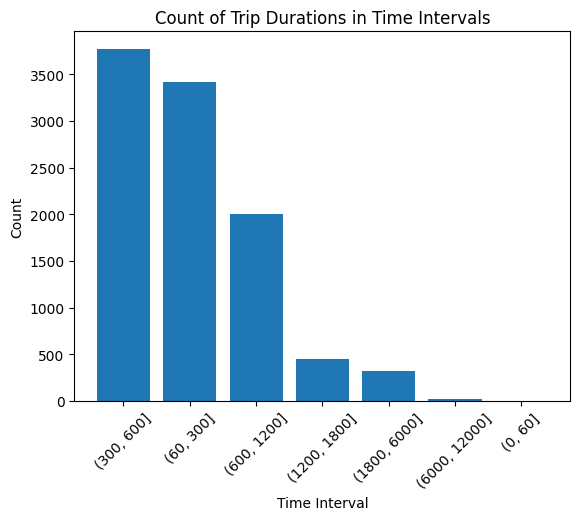

In [106]:
cd1 = cd[cd['Trip Duration'] < 1000000].iloc[1:10000]

# Define time intervals
time_intervals = [0, 60, 300, 600, 1200, 1800, 6000, 12000]

# Categorize 'Trip Duration' into time intervals
#cd1['Time Interval'] = pd.cut(cd1['Trip Duration'], bins=time_intervals)

# Count the occurrences in each time interval
#counts = cd1['Time Interval'].value_counts().sort_index()

counts = pd.cut(cd1['Trip Duration'], bins=time_intervals).value_counts()

# Plotting
plt.bar(x=counts.index.astype(str), height=counts)
plt.xlabel('Time Interval')
plt.ylabel('Count')
plt.title('Count of Trip Durations in Time Intervals')
plt.xticks(rotation=45)
plt.show()
